In [1]:
#!pip install mlxtend

In [73]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
def get_num_cols(data):
    cols = data.columns
    num_cols = data._get_numeric_data().columns
    return num_cols

In [4]:
def get_categorical_cols(data):
    cols = data.columns
    num_cols = data._get_numeric_data().columns
    cat_cols = list(set(cols) - set(num_cols))
    return cat_cols

In [5]:
def get_xy_from_data(data):
    data.arstmade = data.arstmade.astype('int')
    y_train = data['arstmade']
    X_train = data.loc[: , data.columns != 'arstmade']
    return X_train, y_train

In [6]:
def transform_target(data):
    for i in range(len(data)):
        if data.loc[i,'arstmade'] == 'N':
            data.loc[i,'arstmade'] = 0
        else:
            data.loc[i,'arstmade'] = 1
    return data

In [7]:
def train_data_encoding(data):
    #ONE HOT ENCODING OF THE TRAINING DATA
    cat_cols = get_categorical_cols(data)
    num_cols = get_num_cols(data)

    #one-hot-encode the training data
    df_processed = one_hot_encode_data(data)

    #return the one-hot-encoded training-data

    #cat_dummies - a list of all the categorical feature values 
    cat_dummies = [col for col in df_processed if "__" in col and col.split("__")[0] in cat_cols]

    processed_cols = list(df_processed.columns)
    #processed_cols
    
    return cat_cols, processed_cols, cat_dummies, df_processed

In [8]:
def one_hot_encode_data(data):
    cat_cols = get_categorical_cols(data)
    num_cols = get_num_cols(data)
    dt = pd.get_dummies(data, prefix_sep="__", columns=cat_cols)
    return dt

In [9]:
def prepare_test_data(test_data):
    #Process the test data
    df_test_proc = pd.get_dummies(test_data, prefix_sep="__", columns=train_cat_cols)

    #remove additional feature-columns from the test set
    for col in df_test_proc.columns:
        if("__" in col) and (col.split("__")[0] in train_cat_cols) and col not in train_dummies:
            #print("Removing the additional features {}".format(col))
            df_test_proc.drop(col, axis=1, inplace=True)
        
    #adding missing feature-columns to the test set
    for col in train_dummies:
        if col not in df_test_proc.columns:
            #print("adding missing feature {}".format(col))
            df_test_proc[col]=0
    #reorder test data columns to match training set order
    df_test_proc = df_test_proc.sort_index(axis=1)
    return df_test_proc

In [10]:
from sklearn.model_selection import train_test_split
def train_validation_data_split(data, target, test_data_ratio, seed):
    y = data[target]
    X = data.loc[:, data.columns!= target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_ratio, random_state=seed)
    return X_train, X_test, y_train, y_test

Load Data

In [11]:
df = pd.read_csv('crime_data_new.csv')
df.head()

,recstat,inout,trhsloc,crimsusp,typeofid,othpers,sumissue,offunif,frisked,searched,...,rf_knowl,sb_hdobj,sb_other,forceuse,race,age,city,weapons,physical_force,arstmade
0,1,O,P,other,V,N,N,N,Y,N,...,N,N,N,N,W,33,BROOKLYN,N,N,N
1,A,O,P,other,V,N,N,N,Y,N,...,N,N,N,SF,B,14,MANHATTAN,N,Y,N
2,1,O,P,MISD,V,N,N,N,N,N,...,N,N,N,SF,B,14,MANHATTAN,N,Y,N
3,1,O,P,other,V,Y,N,N,N,N,...,N,N,N,N,B,14,MANHATTAN,N,N,N
4,1,O,P,other,V,Y,N,N,N,N,...,N,N,N,SF,B,13,MANHATTAN,N,Y,N


In [12]:
df.shape

(30895, 39)

Transform age column into a categorical distribution

In [14]:
df = df.drop('age', axis=1)

In [15]:
target_variable = 'arstmade'

In [16]:
#Transform target variable
df = transform_target(df)

In [17]:
df.head()

,recstat,inout,trhsloc,crimsusp,typeofid,othpers,sumissue,offunif,frisked,searched,...,cs_other,rf_knowl,sb_hdobj,sb_other,forceuse,race,city,weapons,physical_force,arstmade
0,1,O,P,other,V,N,N,N,Y,N,...,N,N,N,N,N,W,BROOKLYN,N,N,0
1,A,O,P,other,V,N,N,N,Y,N,...,Y,N,N,N,SF,B,MANHATTAN,N,Y,0
2,1,O,P,MISD,V,N,N,N,N,N,...,Y,N,N,N,SF,B,MANHATTAN,N,Y,0
3,1,O,P,other,V,Y,N,N,N,N,...,Y,N,N,N,N,B,MANHATTAN,N,N,0
4,1,O,P,other,V,Y,N,N,N,N,...,Y,N,N,N,SF,B,MANHATTAN,N,Y,0


In [18]:
df[target_variable].value_counts()

0    24878
1     6017
Name: arstmade, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_validation_data_split(df, target_variable, test_data_ratio=0.3, seed=0)

In [20]:
X_train.head()

,recstat,inout,trhsloc,crimsusp,typeofid,othpers,sumissue,offunif,frisked,searched,...,cs_vcrim,cs_other,rf_knowl,sb_hdobj,sb_other,forceuse,race,city,weapons,physical_force
24339,1,I,P,other,V,N,N,N,N,N,...,N,N,N,N,N,N,Z,BROOKLYN,N,N
17228,1,O,P,other,V,Y,N,Y,Y,N,...,N,N,N,N,N,N,B,MANHATTAN,N,N
9917,A,I,P,other,P,Y,N,Y,Y,N,...,N,N,N,N,N,N,Q,STATEN IS,N,N
13140,1,I,P,other,V,N,N,Y,N,N,...,N,N,N,N,N,N,B,QUEENS,N,N
7437,1,I,T,other,V,N,N,N,N,N,...,N,N,N,N,N,N,B,MANHATTAN,N,N


In [21]:
X_train.shape

(21626, 37)

In [22]:
X_test.head()

,recstat,inout,trhsloc,crimsusp,typeofid,othpers,sumissue,offunif,frisked,searched,...,cs_vcrim,cs_other,rf_knowl,sb_hdobj,sb_other,forceuse,race,city,weapons,physical_force
2436,1,I,P,other,R,Y,N,Y,Y,N,...,N,Y,N,N,N,N,Z,BRONX,N,N
13872,1,O,H,other,P,N,N,Y,Y,N,...,N,Y,N,N,N,SF,B,MANHATTAN,N,Y
6733,A,O,P,other,P,Y,N,N,N,N,...,N,N,N,N,N,N,Q,QUEENS,N,N
7155,A,O,P,other,V,Y,N,N,Y,N,...,N,Y,Y,N,N,N,B,STATEN IS,N,N
1751,A,O,P,other,P,Y,N,N,Y,N,...,N,Y,N,N,N,N,Z,BROOKLYN,N,N


In [23]:
X_test.shape

(9269, 37)

One-Hot Encoding

In [24]:
#ONE HOT ENCODING OF THE TRAINING DATA
train_cat_cols, train_encoded_cols, train_dummies, X_train = train_data_encoding(X_train)
X_train = X_train.sort_index(axis=1)

In [25]:
X_train.head()

,ac_assoc__N,ac_assoc__Y,ac_evasv__N,ac_evasv__Y,ac_inves__N,ac_inves__Y,ac_proxm__N,ac_proxm__Y,city__BRONX,city__BROOKLYN,...,sumissue__Y,trhsloc__H,trhsloc__P,trhsloc__T,typeofid__O,typeofid__P,typeofid__R,typeofid__V,weapons__N,weapons__Y
24339,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
17228,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
9917,1,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
13140,1,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
7437,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [26]:
X_train.shape

(21626, 94)

In [27]:
y_train.shape

(21626,)

In [28]:
X_test = prepare_test_data(X_test)

In [29]:
X_test.head()

,ac_assoc__N,ac_assoc__Y,ac_evasv__N,ac_evasv__Y,ac_inves__N,ac_inves__Y,ac_proxm__N,ac_proxm__Y,city__BRONX,city__BROOKLYN,...,sumissue__Y,trhsloc__H,trhsloc__P,trhsloc__T,typeofid__O,typeofid__P,typeofid__R,typeofid__V,weapons__N,weapons__Y
2436,1,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
13872,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6733,1,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7155,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1751,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [30]:
X_test.shape

(9269, 94)

In [31]:
y_test.shape

(9269,)

In [32]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [33]:
y_test.value_counts()

0    7431
1    1838
Name: arstmade, dtype: int64

Bernoulli NB-model

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn import model_selection, naive_bayes
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [35]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(fit_prior=True, alpha=1)
nb = model.fit(X_train, y_train)

In [36]:
pd = nb.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, pd))
print("Precision:",metrics.precision_score(y_test, pd))
print("Recall:",metrics.recall_score(y_test, pd))

Accuracy: 0.8638472327111878
Precision: 0.6395348837209303
Recall: 0.7181719260065288


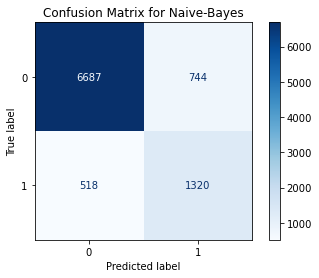

In [38]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

matrix = plot_confusion_matrix(nb, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive-Bayes')
plt.show(matrix)
plt.show()

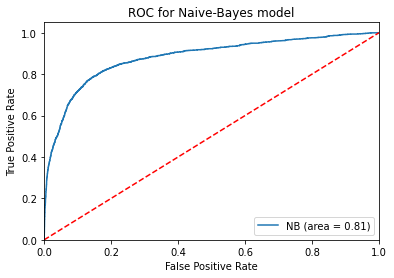

In [39]:
nb_roc_auc = roc_auc_score(y_test, model.fit(X_train, y_train).predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.fit(X_train, y_train).predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive-Bayes model')
plt.legend(loc="lower right")
plt.savefig('NB_model')
plt.show()

Naive-Bayes with Cross Validation

In [40]:
def performCV(X, Y, model, folds, measure):
  return cross_val_score(model, X, Y, cv=folds, scoring=measure)

5-fold Cross Validation

In [41]:
model =  BernoulliNB()

accuracy = performCV(X_test, y_test, model, 5, 'accuracy')
recall = performCV(X_test, y_test, model, 5, 'recall')
precision = performCV(X_test, y_test, model, 5, 'precision')
f1score = performCV(X_test, y_test, model, 5, 'f1')

In [42]:
print("Accuracy: ", accuracy.mean(), "Recall: ", recall.mean(), "Precision: ", 
      precision.mean(), "f1-score: ", f1score.mean())

Accuracy:  0.8652481092790432 Recall:  0.7219731074517237 Precision:  0.6430556778483123 f1-score:  0.6801529347768078


10-fold Cross Validation

In [98]:
model =  BernoulliNB()

accuracy = performCV(X_test, y_test, model, 10, 'accuracy')
recall = performCV(X_test, y_test, model, 10, 'recall')
precision = performCV(X_test, y_test, model, 10, 'precision')
f1score = performCV(X_test, y_test, model, 10, 'f1')

In [99]:
print("Accuracy: ", accuracy.mean(), "Recall: ", recall.mean(), "Precision: ", 
      precision.mean(), "f1-score: ", f1score.mean())

Accuracy:  0.8650335157653408 Recall:  0.7203878593490141 Precision:  0.642940115558289 f1-score:  0.6792610325233983


Text(0.5, 1.0, 'PR-curve: Naive-Bayes AP=0.52')

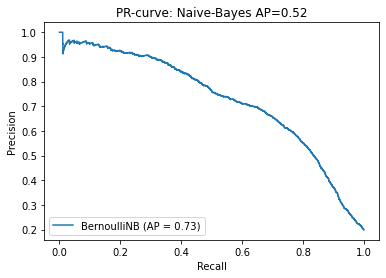

In [100]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(nb, X_test, y_test)
disp.ax_.set_title('PR-curve: Naive-Bayes '
                   'AP={0:0.2f}'.format(average_precision))